In [3]:
import os
from pathlib import Path
root = "/home/shansiming/project/github-red-diffeq/red-diffeq"
os.chdir(root)

In [3]:
!CUDA_VISIBLE_DEVICES=1 python scripts/run_inversion.py \
    --config example/example_config/red-diffeq_openfwi.yaml \
    --sample_index 0 \
    --batch_size 1 \
    --random_seed 8888 \
    --ts 300 \
    --lr 0.03 \
    --regularization diffusion \
    --reg_lambda 0.75 \
    --sigma 10.0

Loading configuration from: example/example_config/red-diffeq_openfwi.yaml
   - Random seed set to: 8888
   - Python random: 8888
   - NumPy: 8888
   - PyTorch CPU: 8888
   - PyTorch CUDA (all devices): 8888
   - cuDNN deterministic: True
   - cuDNN benchmark: False
   - Deterministic algorithms: Enabled
   - CUBLAS_WORKSPACE_CONFIG: :4096:8
   - TF32 disabled (bit-perfect reproducibility)

Configuration:

Using device: cuda
GPU: NVIDIA GeForce RTX 3090
Initializing models...
Loaded pretrained model from: pretrained_models/model-4.pt
Results will be saved to: example/example_result/openfwi/example_openfwi/openfwi_model_4/20260127_202158
Configuration saved to: example/example_result/openfwi/example_openfwi/openfwi_model_4/20260127_202158/config.yaml
Loading data files...
Found 1 data families to process

Processing: CF_sample0.npy
Processing only sample 0 (out of 1 samples)
Optimizing:   0%|                                     | 0/300 [00:00<?, ?step/s]
Optimizing:   0%| | 0/300 [00:02

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# load the result
result = np.load(os.path.join(root, "example/example_result/openfwi/example_openfwi/openfwi_model_4/20260127_202158/CF_sample0/0_results.npz"))
for key in result.keys():
    print(key)

result
initial_velocity
ground_truth
total_losses
obs_losses
reg_losses
ssim
mae
rmse


OpenFWI CF velocity model shape: (70, 70)


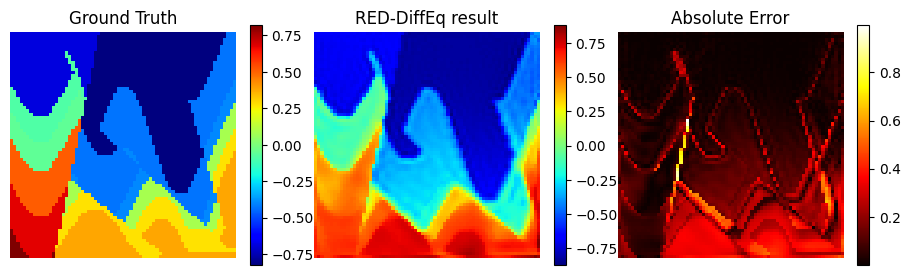

In [16]:
from red_diffeq.utils.data_trans import v_normalize
vm = result['result']
gt = v_normalize(result['ground_truth'])
print(f"OpenFWI CF velocity model shape: {vm.shape}")

# Plot result
plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(gt, cmap='jet')
plt.title('Ground Truth')
plt.axis('off')
plt.colorbar(shrink=0.8)

plt.subplot(1, 3, 2)
plt.imshow(vm, cmap='jet')
plt.title('RED-DiffEq result')
plt.axis('off')
plt.colorbar(shrink=0.8)

plt.subplot(1, 3, 3)
abs_error = np.abs(vm - gt)
plt.imshow(abs_error, cmap='hot')
plt.title('Absolute Error')
plt.axis('off')
plt.colorbar(shrink=0.8)

plt.tight_layout(pad=0)
plt.show()